<h1>Kelompok 2</h1>
<h2>Anggota Kelompok : </h2>
<ul>
    <li>Khenny Fileo Suciady</li>
    <li>Yosia Farianto</li>
    <li>Jody Nordberg Imanuel</li>
<ul>

# Memanggil data

In [151]:
#  Memanggil semua data dari file excel

import pandas as pd


data_indojakarta = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Data Indonesia dan Jakarta')
data_rdt_ag = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='RDT Ag', header=[0,1])
data_vaksinasi = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx', sheet_name='Vaksinasi', header=[0,1,2], skiprows=2)

# 1. Model regresi berdasarkan hari untuk kasus Positif Harian Jakarta (data diambil dari kolom Tanggal Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta):

• Mulai dari 1 Maret 2020 semenjak kasus pertama

• Mulai dari 1 Januari 2021 semenjak awal tahun baru

• Mulai dari 9 Februari 2021 semenjak diadakan PPKM jilid 2


In [152]:
#  5 data awal untuk data Indonesia dan Jakarta
data_indojakarta.head(5)

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,0,0,2,2,1,0,0,2,3,...,0,0,2,3,2,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,2020-03-05,0,0,2,2,3,0,0,4,7,...,0,0,2,4,2,NaN,NaN,NaN,NaN,NaN


In [3]:
# Informasi data_indojakarta

data_indojakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Tanggal                          407 non-null    datetime64[ns]
 1   Meninggal (Indonesia)            407 non-null    int64         
 2   Sembuh (Indonesia)               407 non-null    int64         
 3   Dirawat (Indonesia)              407 non-null    int64         
 4   Positif (Indonesia)              407 non-null    int64         
 5   Meninggal (Jakarta)              407 non-null    int64         
 6   Sembuh (Jakarta)                 407 non-null    int64         
 7   Self-Isolation (Jakarta)         407 non-null    int64         
 8   Dirawat (Jakarta)                407 non-null    int64         
 9   Positif (Jakarta)                407 non-null    int64         
 10  Positif Aktif (Jakarta)          407 non-null    int64        

In [4]:
#  menghapus column yang memilki nilai null
data_indojakarta = data_indojakarta.dropna(axis='columns')

# Mengubah data bertipe datetime ke dalam integer menggunakan OrdinalEncoder

In [5]:
# mengubah data pada column tanggal menjadi numerik menggunakan Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_indojakarta_encoded = ordinal_encoder.fit_transform(data_indojakarta[['Tanggal']])
data_indojakarta_encoded[1:]




array([[  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 6

In [6]:
#  hasil dari Ordinal Encoder
data_indojakarta['Tanggal'] = data_indojakarta_encoded
data_indojakarta

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,2,2,0,0,0,0,0,...,0,0,2,2,0,0,0,0,0,0
2,2.0,0,0,2,2,1,0,0,2,3,...,0,0,0,0,1,0,0,2,3,2
3,3.0,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0,0,2,2,3,0,0,4,7,...,0,0,0,0,2,0,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,402.0,42064,1391742,113570,1547376,6391,375651,2814,3482,388338,...,87,5769,-996,4860,12,571,109,170,862,279
403,403.0,42227,1399382,111271,1552880,6410,376270,3244,3653,389577,...,163,7640,-2299,5504,19,619,430,171,1239,601
404,404.0,42348,1405679,110118,1558145,6424,376959,3506,3701,390590,...,121,6297,-1153,5265,14,689,262,48,1013,310
405,405.0,42443,1409288,111137,1562868,6435,377797,3716,3619,391567,...,95,3609,1019,4723,11,838,210,-82,977,128


In [7]:
data_indojakarta = data_indojakarta.drop(data_indojakarta.iloc[0:, 1:19], axis=1)

In [8]:
data_indojakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tanggal                         407 non-null    float64
 1   Positif Harian (Jakarta)        407 non-null    int64  
 2   Positif Aktif Harian (Jakarta)  407 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.7 KB


# Membagi data berdasarkan tanggal kedalam tiga variabel 

In [9]:
# data_indojakarta yang dimulai dari 1 Maret 2020
# data_indojakarta yang dimulai dari 1 Januari 2021
#  data_indojakarta yang dimulaidari 9 Februari 2021

data_indojakarta_1_maret_2020 = data_indojakarta[1:]
data_indojakarta_1_januari_2021 = data_indojakarta[306:]
data_indojakarta_9_februari_2021 = data_indojakarta[345:]

In [10]:
#  1 Maret 2020
data_indojakarta_1_maret_2020.head(5)

,Tanggal,Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
1,1.0,0,0
2,2.0,3,2
3,3.0,0,0
4,4.0,4,2
5,5.0,0,0


In [11]:
# 1 Januari 2021

data_indojakarta_1_januari_2021.head(5)

,Tanggal,Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
306,306.0,1956,304
307,307.0,1895,-400
308,308.0,1657,-83
309,309.0,1832,-718
310,310.0,1824,706


In [12]:
#  9 Februari 2021

data_indojakarta_9_februari_2021.head(5)

,Tanggal,Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
345,345.0,3437,599
346,346.0,3309,21
347,347.0,2514,-1514
348,348.0,3810,-1997
349,349.0,3018,-1644


# Memasukkan data yang akan diregresi ke dalam variabel X dan Y

In [13]:
# Memasukkan data_indojakarta column Tanggal dan Positif Harian Jakarta Ke dalam masing-masing variabel X dan Y

X_1maret = data_indojakarta_1_maret_2020['Tanggal'].values
y_1maret = data_indojakarta_1_maret_2020['Positif Harian (Jakarta)'].values


In [14]:
# mereshape setiap data X sebleum masuk ke dalam regresi

X_1maret = X_1maret.reshape(-1,1)




In [15]:
X_1januari = data_indojakarta_1_januari_2021['Tanggal'].values
y_1januari = data_indojakarta_1_januari_2021['Positif Harian (Jakarta)'].values

In [16]:
X_1januari = X_1januari.reshape(-1,1)



In [17]:
X_9februari = data_indojakarta_9_februari_2021['Tanggal'].values
y_9februari = data_indojakarta_9_februari_2021['Positif Harian (Jakarta)'].values

In [18]:
X_9februari = X_9februari.reshape(-1,1)



# Membuat model Linear Regression 

In [19]:
#  Mebuat model Linear Regresion

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

Intercept when fit_intercept=True : -260.75858
Intercept when fit_intercept=False : 0.00000


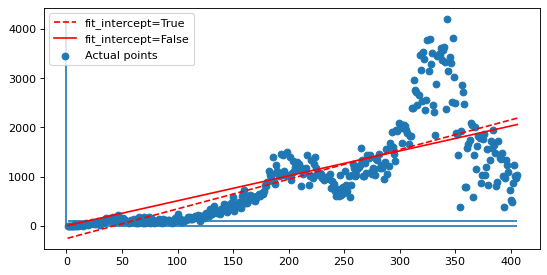

In [20]:
# model 1

bias = 100

lr_fi_true_1maret = LinearRegression(fit_intercept=True)
lr_fi_false_1maret = LinearRegression(fit_intercept=False)

lr_fi_true_1maret.fit(X_1maret, y_1maret)
lr_fi_false_1maret.fit(X_1maret, y_1maret)

print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true_1maret.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false_1maret.intercept_))

lr_fi_true_yhat_1maret = np.dot(X_1maret, lr_fi_true_1maret.coef_) + lr_fi_true_1maret.intercept_
lr_fi_false_yhat_1maret = np.dot(X_1maret, lr_fi_false_1maret.coef_) + lr_fi_false_1maret.intercept_


plt.figure(figsize=(8,4), dpi=80) 
plt.scatter(X_1maret, y_1maret, label='Actual points')
plt.plot(X_1maret, lr_fi_true_yhat_1maret, 'r--', label='fit_intercept=True')
plt.plot(X_1maret, lr_fi_false_yhat_1maret, 'r-', label='fit_intercept=False')
plt.legend()


plt.vlines(0, 0, y_1maret.max())
plt.hlines(bias, X_1maret.min(), X_1maret.max())
plt.hlines(0, X_1maret.min(), X_1maret.max())



plt.show()



Intercept when fit_intercept=True : 10377.02782
Intercept when fit_intercept=False : 0.00000


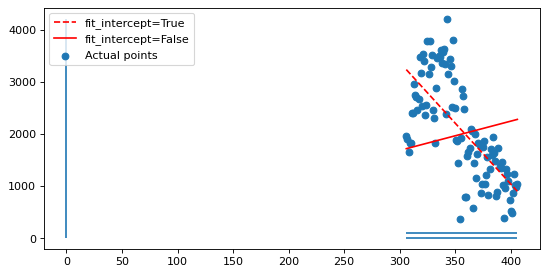

In [21]:
# model 2
lr_fi_true_1januari = LinearRegression(fit_intercept=True)
lr_fi_false_1januari = LinearRegression(fit_intercept=False)

lr_fi_true_1januari.fit(X_1januari, y_1januari)
lr_fi_false_1januari.fit(X_1januari, y_1januari)


print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true_1januari.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false_1januari.intercept_))

lr_fi_true_yhat_1januari = np.dot(X_1januari, lr_fi_true_1januari.coef_) + lr_fi_true_1januari.intercept_
lr_fi_false_yhat_1januari = np.dot(X_1januari, lr_fi_false_1januari.coef_) + lr_fi_false_1januari.intercept_

plt.figure(figsize=(8,4), dpi=80) 
plt.scatter(X_1januari, y_1januari, label='Actual points')
plt.plot(X_1januari, lr_fi_true_yhat_1januari, 'r--', label='fit_intercept=True')
plt.plot(X_1januari, lr_fi_false_yhat_1januari, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0, 0, y_1januari.max())
plt.hlines(bias, X_1januari.min(), X_1januari.max())
plt.hlines(0, X_1januari.min(), X_1januari.max())

Intercept when fit_intercept=True : 11662.80479
Intercept when fit_intercept=False : 0.00000


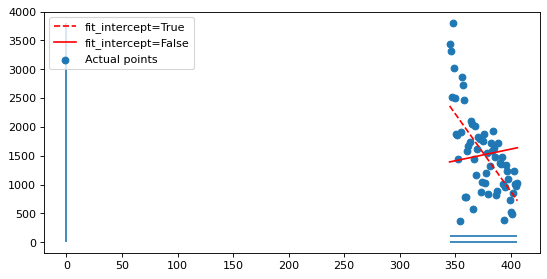

In [22]:
# model 3

lr_fi_true_9februari = LinearRegression(fit_intercept=True)
lr_fi_false_9februari = LinearRegression(fit_intercept=False)

lr_fi_true_9februari.fit(X_9februari, y_9februari)
lr_fi_false_9februari.fit(X_9februari, y_9februari)


print('Intercept when fit_intercept=True : {:.5f}'.format(lr_fi_true_9februari.intercept_))
print('Intercept when fit_intercept=False : {:.5f}'.format(lr_fi_false_9februari.intercept_))


lr_fi_true_yhat_9februari = np.dot(X_9februari, lr_fi_true_9februari.coef_) + lr_fi_true_9februari.intercept_
lr_fi_false_yhat_9februari = np.dot(X_9februari, lr_fi_false_9februari.coef_) + lr_fi_false_9februari.intercept_

plt.figure(figsize=(8,4), dpi=80) 
plt.scatter(X_9februari, y_9februari, label='Actual points')
plt.plot(X_9februari, lr_fi_true_yhat_9februari, 'r--', label='fit_intercept=True')
plt.plot(X_9februari, lr_fi_false_yhat_9februari, 'r-', label='fit_intercept=False')
plt.legend()

plt.vlines(0,0, y_9februari.max())
plt.hlines(bias, X_9februari.min(), X_9februari.max())
plt.hlines(0, X_9februari.min(), X_9februari.max())

plt.show()

# Pengaruh nilai m terhadap ketiga kasus diatas

m merupakan kemiringan dari suatu garis (gradien). Pengaruh m  adalah sebagai koefiesien dari ketiga model diatas. Sehingga dengan adanya m, kita dapat mengetahui seberapa besar kemiringan dari data yang kita pakai. Seperti contoh untuk yang model ketiga dan kedua, kemiringannya bernilai negatif dan model pertama, kemiringannya bernilai positif.    

In [23]:
lr_fi_true_1maret.coef_

array([6.0331633])

In [24]:
lr_fi_true_1januari.coef_

array([-23.34010483])

In [25]:
lr_fi_true_9februari.coef_

array([-26.95180177])

# Melakukan prediksi dari ketiga model mulai dari 29 Maret 2021 hingga 11 April 2021 (2 minggu)


In [26]:
y_1maret = y_1maret.reshape(-1,1)
y_1januari = y_1januari.reshape(-1,1)
y_9februari = y_9februari.reshape(-1,1)

In [27]:
# model 1
y_pred = lr_fi_false_1maret.predict(y_1maret)
y_pred[392:]

array([5141.9478674 , 1947.24652967, 4893.47109669, 6779.86617231,
       6287.98358539, 5567.90804577, 3732.2225152 , 2652.10920577,
       2469.55484362, 4371.16278274, 6282.91263088, 5136.8769129 ,
       4954.32255074, 5228.15409398])

In [28]:
y_1maret[392:]

array([[1014],
       [ 384],
       [ 965],
       [1337],
       [1240],
       [1098],
       [ 736],
       [ 523],
       [ 487],
       [ 862],
       [1239],
       [1013],
       [ 977],
       [1031]], dtype=int64)

In [29]:
#  model 2
y_pred1 = lr_fi_false_1januari.predict(y_1januari)
y_pred1[87:]

array([5693.25948888, 2156.02726206, 5418.1414268 , 7506.79283692,
       6962.17136707, 6164.89045246, 4132.38558562, 2936.46421369,
       2734.33665788, 4839.83203098, 6956.55671275, 5687.64483455,
       5485.51727874, 5788.70861246])

In [30]:
y_1januari[87:]

array([[1014],
       [ 384],
       [ 965],
       [1337],
       [1240],
       [1098],
       [ 736],
       [ 523],
       [ 487],
       [ 862],
       [1239],
       [1013],
       [ 977],
       [1031]], dtype=int64)

In [31]:
#  model 3
y_pred2 = lr_fi_false_9februari.predict(y_9februari)
y_pred2[48:]

array([4093.73496505, 1550.29016428, 3895.91148055, 5397.7550772 ,
       5006.14532216, 4432.86093849, 2971.38948154, 2111.46290604,
       1966.12320314, 3480.07844169, 5002.10810819, 4089.69775109,
       3944.35804818, 4162.36760254])

In [32]:
y_9februari[48:]

array([[1014],
       [ 384],
       [ 965],
       [1337],
       [1240],
       [1098],
       [ 736],
       [ 523],
       [ 487],
       [ 862],
       [1239],
       [1013],
       [ 977],
       [1031]], dtype=int64)

# Score dari tiap-tiap model

In [33]:
#  model 1
from sklearn import metrics
linReg_score_model1 = metrics.r2_score(y_1maret,y_pred)
linReg_score_model1

-33.68610802286792

In [34]:
# model 2

linReg_score_model2 = metrics.r2_score(y_1januari,y_pred1)
linReg_score_model2

-116.42967956824677

In [35]:

linReg_score_model3 = metrics.r2_score(y_9februari,y_pred2)
linReg_score_model3

-47.75838949082489

 Sehingga dapat kita simpulkan bahwa model pertama memiliki akurasi yang lebih baik dibandingkan dengan model kedua dan ketiga. 

# 2. Buat scatter plot matrix dan cari nilai korelasi terhadap Positif Harian (Jakarta) (data diambil dari kolom Positif Harian (Jakarta) dari sheet Data Indonesia dan Jakarta) dengan:


    • Data Tes Harian, Positive Harian, dan Positivity Harian untuk judul kolom TotalDKI Jakarta dari sheet RDT Ag (Anti Gen)

    • Data Vaksinasi 1, Vaksinasi 2, Persentase 1, Persentase 2 untuk 
    judul kolom Tenaga Kesehatan, Lanjut Usia, Pelayan Publik, dan Total untuk judul DKI dari sheet Vaksinasi


# memanggil data awal dari dataset antigen

In [36]:
#  5 data awal dari data antigen
data_rdt_ag.head(5)

No.        EIS                                          \
  Unnamed: 0_level_1        Tgl Positif Negatif   Total Positivity Rate   
0                1.0 2021-01-01    76.0  1116.0  1192.0        0.063758   
1                2.0 2021-01-02    76.0  1116.0  1192.0        0.063758   
2                3.0 2021-01-03   100.0  1699.0  1799.0        0.055586   
3                4.0 2021-01-04   100.0  1699.0  1799.0        0.055586   
4                5.0 2021-01-05   100.0  1699.0  1799.0        0.055586   

      NAR                                ... Excel                  \
  Positif Negatif Total Positivity Rate  ... Total Positivity Rate   
0     0.0     0.0   0.0             NaN  ...   0.0             NaN   
1     0.0     0.0   0.0             NaN  ...   0.0             NaN   
2     0.0     0.0   0.0             NaN  ...   0.0             NaN   
3     0.0     0.0   0.0             NaN  ...   0.0             NaN   
4     0.0     0.0   0.0             NaN  ...   0.0             NaN   

  Total DKI Jakarta                                                        \
         Tes Harian Positif  Harian Negatif Harian Positivity Rate Harian   
0            1192.0            76.0         1116.0               0.063758   
1               0.0             0.0            0.0                    NaN   
2             607.0            24.0          583.0               0.039539   
3               0.0             0.0            0.0                    NaN   
4               0.0             0.0            0.0                    NaN   

                                                       \
  Total Kumulatif Positif Kumulatif Negatif Kumulatif   
0          1192.0              76.0            1116.0   
1          1192.0              76.0            1116.0   
2          1799.0             100.0            1699.0   
3          1799.0             100.0            1699.0   
4          1799.0             100.0            1699.0   

                             
  Positivity Rate Kumulatif  
0                  0.063758  
1                  0.063758  
2                  0.055586  
3                  0.055586  
4                  0.055586  

[5 rows x 22 columns]

In [37]:
data_rdt_ag.shape

(999, 22)

In [38]:
# menghapus semua baris berisi nilai none yang memiliki kurang dari satu nilai tidak none pada baris tersebut
data_rdt_ag = data_rdt_ag.dropna(thresh=1)

In [39]:
data_rdt_ag.shape

(101, 22)

# Memanggil data awal dari dataset vaksinasi 

In [40]:
data_vaksinasi.head()

Tanggal              DKI                                       \
  Unnamed: 0_level_1 Tenaga Kesehatan                                        
  Unnamed: 0_level_2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1   
0       5 Maret 2021         112301.0    141425.0     91078.0     1.259339   
1       6 Maret 2021         112301.0    144046.0     91379.0     1.282678   
2       7 Maret 2021         112301.0    177126.0     91460.0     1.577243   
3       8 Maret 2021         112301.0    181237.0     92988.0     1.613850   
4       9 Maret 2021         112301.0    113326.0     89984.0     1.009127   

                                                                      ...  \
                         Lansia                                       ...   
  Persentase 2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1  ...   
0     0.811017         911631.0     76451.0         0.0     0.083862  ...   
1     0.813697         911631.0     79421.0         0.0     0.087120  ...   
2     0.814418         911631.0     83628.0         0.0     0.091734  ...   
3     0.828025         911631.0     95140.0         1.0     0.104362  ...   
4     0.801275         911631.0    135128.0       675.0     0.148227  ...   

         Indonesia                                                    \
    Pelayan Publik                                                     
  Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2   
0       17327169.0    541888.0      2597.0     0.031274     0.000150   
1       17327169.0    604456.0      4169.0     0.034885     0.000241   
2       17327169.0    623474.0      4445.0     0.035982     0.000257   
3       17327169.0    715767.0      8880.0     0.041309     0.000512   
4       17327169.0   1510937.0     68527.0     0.087200     0.003955   

                                                                      
             Total                                                    
  Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2  
0       40349051.0   2413615.0   1114537.0     0.059818     0.027622  
1       40349051.0   2552265.0   1130524.0     0.063255     0.028019  
2       40349051.0   2888757.0   1133787.0     0.071594     0.028099  
3       40349051.0   3098025.0   1158432.0     0.076781     0.028710  
4       40349051.0   3337026.0   1197772.0     0.082704     0.029685  

[5 rows x 41 columns]

In [41]:
data_vaksinasi.shape

(994, 41)

In [42]:
data_vaksinasi = data_vaksinasi.dropna(thresh=1)

In [43]:
data_vaksinasi.shape

(38, 41)

# Mengambil data dari dataset antigen mulai dari 5 maret 2021

In [153]:

data_antigen = data_rdt_ag[63:]
data_antigen.head(5)

No.        EIS                                            \
   Unnamed: 0_level_1        Tgl Positif  Negatif    Total Positivity Rate   
63               64.0 2021-03-05  2592.0  35562.0  38154.0        0.067935   
64               65.0 2021-03-06  2624.0  36155.0  38779.0        0.067665   
65               66.0 2021-03-07  2686.0  36563.0  39249.0        0.068435   
66               67.0 2021-03-08  2704.0  36741.0  39445.0        0.068551   
67               68.0 2021-03-09  2711.0  36894.0  39605.0        0.068451   

       NAR                                  ...   Excel                  \
   Positif Negatif   Total Positivity Rate  ...   Total Positivity Rate   
63   191.0  4753.0  4944.0        0.038633  ...  1016.0        0.041339   
64   219.0  5525.0  5744.0        0.038127  ...  1016.0        0.041339   
65   254.0  6391.0  6645.0        0.038224  ...  1016.0        0.041339   
66   269.0  6917.0  7186.0        0.037434  ...  1016.0        0.041339   
67   280.0  7248.0  7528.0        0.037194  ...  1016.0        0.041339   

   Total DKI Jakarta                                                        \
          Tes Harian Positif  Harian Negatif Harian Positivity Rate Harian   
63            1297.0            49.0         1248.0               0.037779   
64            1425.0            60.0         1365.0               0.042105   
65            1371.0            97.0         1274.0               0.070751   
66             737.0            33.0          704.0               0.044776   
67             502.0            18.0          484.0               0.035857   

                                                        \
   Total Kumulatif Positif Kumulatif Negatif Kumulatif   
63         44114.0            2825.0           41289.0   
64         45539.0            2885.0           42654.0   
65         46910.0            2982.0           43928.0   
66         47647.0            3015.0           44632.0   
67         48149.0            3033.0           45116.0   

                              
   Positivity Rate Kumulatif  
63                  0.064039  
64                  0.063352  
65                  0.063569  
66                  0.063278  
67                  0.062992  

[5 rows x 22 columns]

In [45]:
data_antigen = data_antigen.reset_index()

In [46]:
data_antigen.head(5)

index                No.        EIS                            \
        Unnamed: 0_level_1        Tgl Positif  Negatif    Total   
0    63               64.0 2021-03-05  2592.0  35562.0  38154.0   
1    64               65.0 2021-03-06  2624.0  36155.0  38779.0   
2    65               66.0 2021-03-07  2686.0  36563.0  39249.0   
3    66               67.0 2021-03-08  2704.0  36741.0  39445.0   
4    67               68.0 2021-03-09  2711.0  36894.0  39605.0   

                      NAR                  ...   Excel                  \
  Positivity Rate Positif Negatif   Total  ...   Total Positivity Rate   
0        0.067935   191.0  4753.0  4944.0  ...  1016.0        0.041339   
1        0.067665   219.0  5525.0  5744.0  ...  1016.0        0.041339   
2        0.068435   254.0  6391.0  6645.0  ...  1016.0        0.041339   
3        0.068551   269.0  6917.0  7186.0  ...  1016.0        0.041339   
4        0.068451   280.0  7248.0  7528.0  ...  1016.0        0.041339   

  Total DKI Jakarta                                                        \
         Tes Harian Positif  Harian Negatif Harian Positivity Rate Harian   
0            1297.0            49.0         1248.0               0.037779   
1            1425.0            60.0         1365.0               0.042105   
2            1371.0            97.0         1274.0               0.070751   
3             737.0            33.0          704.0               0.044776   
4             502.0            18.0          484.0               0.035857   

                                                       \
  Total Kumulatif Positif Kumulatif Negatif Kumulatif   
0         44114.0            2825.0           41289.0   
1         45539.0            2885.0           42654.0   
2         46910.0            2982.0           43928.0   
3         47647.0            3015.0           44632.0   
4         48149.0            3033.0           45116.0   

                             
  Positivity Rate Kumulatif  
0                  0.064039  
1                  0.063352  
2                  0.063569  
3                  0.063278  
4                  0.062992  

[5 rows x 23 columns]

In [47]:
# menghapus kolom yang tidak diperlukan
data_antigen = data_antigen.drop(data_antigen[['index','No.','EIS','NAR','Excel']],axis=1)
data_antigen.head()

Total DKI Jakarta                                                        \
         Tes Harian Positif  Harian Negatif Harian Positivity Rate Harian   
0            1297.0            49.0         1248.0               0.037779   
1            1425.0            60.0         1365.0               0.042105   
2            1371.0            97.0         1274.0               0.070751   
3             737.0            33.0          704.0               0.044776   
4             502.0            18.0          484.0               0.035857   

                                                       \
  Total Kumulatif Positif Kumulatif Negatif Kumulatif   
0         44114.0            2825.0           41289.0   
1         45539.0            2885.0           42654.0   
2         46910.0            2982.0           43928.0   
3         47647.0            3015.0           44632.0   
4         48149.0            3033.0           45116.0   

                             
  Positivity Rate Kumulatif  
0                  0.064039  
1                  0.063352  
2                  0.063569  
3                  0.063278  
4                  0.062992

In [48]:
data_antigen.shape

(38, 8)

# Data dari dataset vaksinasi sudah dimulai dari 5 Maret 2021

In [49]:
data_vaksinasi.shape

(38, 41)

In [50]:
data_vaksinasi.head()

Tanggal              DKI                                       \
  Unnamed: 0_level_1 Tenaga Kesehatan                                        
  Unnamed: 0_level_2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1   
0       5 Maret 2021         112301.0    141425.0     91078.0     1.259339   
1       6 Maret 2021         112301.0    144046.0     91379.0     1.282678   
2       7 Maret 2021         112301.0    177126.0     91460.0     1.577243   
3       8 Maret 2021         112301.0    181237.0     92988.0     1.613850   
4       9 Maret 2021         112301.0    113326.0     89984.0     1.009127   

                                                                      ...  \
                         Lansia                                       ...   
  Persentase 2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1  ...   
0     0.811017         911631.0     76451.0         0.0     0.083862  ...   
1     0.813697         911631.0     79421.0         0.0     0.087120  ...   
2     0.814418         911631.0     83628.0         0.0     0.091734  ...   
3     0.828025         911631.0     95140.0         1.0     0.104362  ...   
4     0.801275         911631.0    135128.0       675.0     0.148227  ...   

         Indonesia                                                    \
    Pelayan Publik                                                     
  Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2   
0       17327169.0    541888.0      2597.0     0.031274     0.000150   
1       17327169.0    604456.0      4169.0     0.034885     0.000241   
2       17327169.0    623474.0      4445.0     0.035982     0.000257   
3       17327169.0    715767.0      8880.0     0.041309     0.000512   
4       17327169.0   1510937.0     68527.0     0.087200     0.003955   

                                                                      
             Total                                                    
  Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2  
0       40349051.0   2413615.0   1114537.0     0.059818     0.027622  
1       40349051.0   2552265.0   1130524.0     0.063255     0.028019  
2       40349051.0   2888757.0   1133787.0     0.071594     0.028099  
3       40349051.0   3098025.0   1158432.0     0.076781     0.028710  
4       40349051.0   3337026.0   1197772.0     0.082704     0.029685  

[5 rows x 41 columns]

In [51]:
#  menghapus data yang tidak diperlukan
data_vaksinasi = data_vaksinasi.drop(data_vaksinasi[['Indonesia']], axis = 1)

In [52]:
data_vaksinasi.head()

Tanggal              DKI                                       \
  Unnamed: 0_level_1 Tenaga Kesehatan                                        
  Unnamed: 0_level_2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1   
0       5 Maret 2021         112301.0    141425.0     91078.0     1.259339   
1       6 Maret 2021         112301.0    144046.0     91379.0     1.282678   
2       7 Maret 2021         112301.0    177126.0     91460.0     1.577243   
3       8 Maret 2021         112301.0    181237.0     92988.0     1.613850   
4       9 Maret 2021         112301.0    113326.0     89984.0     1.009127   

                                                                      ...  \
                         Lansia                                       ...   
  Persentase 2 Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1  ...   
0     0.811017         911631.0     76451.0         0.0     0.083862  ...   
1     0.813697         911631.0     79421.0         0.0     0.087120  ...   
2     0.814418         911631.0     83628.0         0.0     0.091734  ...   
3     0.828025         911631.0     95140.0         1.0     0.104362  ...   
4     0.801275         911631.0    135128.0       675.0     0.148227  ...   

                                                                      \
    Pelayan Publik                                                     
  Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2   
0        1976757.0     64121.0         0.0     0.032437     0.000000   
1        1976757.0     66484.0         0.0     0.033633     0.000000   
2        1976757.0     73752.0      2514.0     0.037310     0.001272   
3        1976757.0     85333.0      3989.0     0.043168     0.002018   
4        1976757.0    174685.0     29195.0     0.088369     0.014769   

                                                                      
             Total                                                    
  Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2  
0        3000689.0    281997.0     91078.0     0.093977     0.030352  
1        3000689.0    289951.0     91379.0     0.096628     0.030453  
2        3000689.0    334506.0     93974.0     0.111476     0.031317  
3        3000689.0    361710.0     96978.0     0.120542     0.032319  
4        3000689.0    423139.0    119854.0     0.141014     0.039942  

[5 rows x 21 columns]

# Mengambil data dari dataset Indo jakarta mulai dari 5 Maret 2021 

In [53]:
#  mengambil data mulai dari 5 Maret 2021
data_indo_jakarta = data_indojakarta[369:]
data_indo_jakarta.head(5)

,Tanggal,Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
369,369.0,1159,-228
370,370.0,1616,53
371,371.0,1834,-17
372,372.0,1783,230
373,373.0,867,-834


In [54]:
data_indo_jakarta = data_indo_jakarta.reset_index()


In [55]:
data_indo_jakarta.head(5)

,index,Tanggal,Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,369,369.0,1159,-228
1,370,370.0,1616,53
2,371,371.0,1834,-17
3,372,372.0,1783,230
4,373,373.0,867,-834


# Mengambil judul dan fitur yang kita perlukan untuk mencari korelasi dan membuat scatter plot matriks

Untuk Dataset Antigen

In [56]:
# Memasukkan Kolom Total DKI Jakarta dari data_antigen kedalam suatu variabel
total_dki_jakarta = data_antigen['Total DKI Jakarta']

In [57]:
total_dki_jakarta.shape

(38, 8)

Untuk Dataset Vaksinasi

In [58]:
#  Memasukkan judul DKI dari data_vaksinasi kedalam suatu variabel
data_DKI = data_vaksinasi['DKI'] 

# Memasukkan masing-masing kolom yang ada pada data_DKI kedalam masing-masing variabel
data_tenaga_kesehatan_dki = data_DKI['Tenaga Kesehatan']
data_lansia_dki = data_DKI['Lansia']
data_pelayan_publik_dki = data_DKI['Pelayan Publik']
data_total_dki = data_DKI['Total']

Mengganti nama fitur yang sama di dalam masing-masing judul yang kita perlukan

In [59]:
#  mengganti nama kolom dari setiap judul
data_tenaga_kesehatan_dki = data_tenaga_kesehatan_dki.rename(columns= 
                                         {'Vaksinasi 1': 'Vaksinasi 1 Tenaga Kesehatan',
                                          'Vaksinasi 2': 'Vaksinasi 2 Tenaga Kesehatan',
                                          'Persentase 1':'Persentase 1 Tenaga Kesehatan',
                                          'Persentase 2':'Persentase 2 Tenaga Kesehatan',
                                         },inplace=False)

data_lansia_dki = data_lansia_dki.rename(columns= 
                                         {'Vaksinasi 1': 'Vaksinasi 1 Lansia',
                                          'Vaksinasi 2': 'Vaksinasi 2 Lansia',
                                          'Persentase 1':'Persentase 1 Lansia',
                                          'Persentase 2':'Persentase 2 Lansia',
                                          },inplace=False)

data_pelayan_publik_dki = data_pelayan_publik_dki.rename(columns= 
                                         {'Vaksinasi 1': 'Vaksinasi 1 Pelayan Publik',
                                          'Vaksinasi 2': 'Vaksinasi 2 Pelayan Publik',
                                          'Persentase 1':'Persentase 1 Pelayan Publik',
                                          'Persentase 2':'Persentase 2 Pelayan Publik',
                                          },inplace=False)
data_total_dki = data_total_dki.rename(columns= 
                                         {'Vaksinasi 1': 'Vaksinasi 1 Total',
                                          'Vaksinasi 2': 'Vaksinasi 2 Total',
                                          'Persentase 1':'Persentase 1 Total',
                                          'Persentase 2':'Persentase 2 Total',
                                         },inplace=False)
                                        



Membuat dataframe baru yang berisi semua komponen yang kita butuhkan

In [60]:
#  Menggabungkan keseluruhan data didalam satu dataframe yang baru

data =  [
        data_indo_jakarta['Positif Harian (Jakarta)'],
    
        total_dki_jakarta[[
                           'Tes Harian',
                           'Positif  Harian',
                           'Positivity Rate Harian'
                         ]],
    
        data_tenaga_kesehatan_dki[[
                                    'Vaksinasi 1 Tenaga Kesehatan',
                                    'Vaksinasi 2 Tenaga Kesehatan',
                                    'Persentase 1 Tenaga Kesehatan',
                                    'Persentase 2 Tenaga Kesehatan'
                                 ]],
    
        data_lansia_dki[[ 
                           'Vaksinasi 1 Lansia',
                           'Vaksinasi 2 Lansia',
                           'Persentase 1 Lansia',
                           'Persentase 2 Lansia'
                       ]],
    
        data_pelayan_publik_dki[[ 
                                  'Vaksinasi 1 Pelayan Publik',
                                  'Vaksinasi 2 Pelayan Publik',
                                  'Persentase 1 Pelayan Publik',
                                  'Persentase 2 Pelayan Publik'
                               ]],
    
        data_total_dki[[
                         'Vaksinasi 1 Total',
                         'Vaksinasi 2 Total',
                         'Persentase 1 Total',
                         'Persentase 2 Total'
                       ]],
    
        ]

new_dataframe = pd.concat(data, axis=1)

In [61]:
new_dataframe.head(5)

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total
0,1159,1297.0,49.0,0.037779,141425.0,91078.0,1.259339,0.811017,76451.0,0.0,0.083862,0.000000,64121.0,0.0,0.032437,0.000000,281997.0,91078.0,0.093977,0.030352
1,1616,1425.0,60.0,0.042105,144046.0,91379.0,1.282678,0.813697,79421.0,0.0,0.087120,0.000000,66484.0,0.0,0.033633,0.000000,289951.0,91379.0,0.096628,0.030453
2,1834,1371.0,97.0,0.070751,177126.0,91460.0,1.577243,0.814418,83628.0,0.0,0.091734,0.000000,73752.0,2514.0,0.037310,0.001272,334506.0,93974.0,0.111476,0.031317
3,1783,737.0,33.0,0.044776,181237.0,92988.0,1.613850,0.828025,95140.0,1.0,0.104362,0.000001,85333.0,3989.0,0.043168,0.002018,361710.0,96978.0,0.120542,0.032319
4,867,502.0,18.0,0.035857,113326.0,89984.0,1.009127,0.801275,135128.0,675.0,0.148227,0.000740,174685.0,29195.0,0.088369,0.014769,423139.0,119854.0,0.141014,0.039942


In [62]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Positif Harian (Jakarta)       38 non-null     int64  
 1   Tes Harian                     38 non-null     float64
 2   Positif  Harian                38 non-null     float64
 3   Positivity Rate Harian         38 non-null     float64
 4   Vaksinasi 1 Tenaga Kesehatan   38 non-null     float64
 5   Vaksinasi 2 Tenaga Kesehatan   38 non-null     float64
 6   Persentase 1 Tenaga Kesehatan  38 non-null     float64
 7   Persentase 2 Tenaga Kesehatan  38 non-null     float64
 8   Vaksinasi 1 Lansia             38 non-null     float64
 9   Vaksinasi 2 Lansia             38 non-null     float64
 10  Persentase 1 Lansia            38 non-null     float64
 11  Persentase 2 Lansia            38 non-null     float64
 12  Vaksinasi 1 Pelayan Publik     38 non-null     float

In [64]:
new_dataframe.tail()

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Persentase 1 Lansia,Persentase 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total
33,862,3665.0,74.0,0.020191,122553.0,106800.0,1.091290,0.951016,500370.0,142698.0,0.548873,0.156530,813740.0,369813.0,0.411654,0.187081,1436663.0,619311.0,0.478778,0.206390
34,1239,4306.0,96.0,0.022294,123061.0,107175.0,1.095814,0.954355,507667.0,148824.0,0.556878,0.163250,844961.0,388298.0,0.427448,0.196432,1475689.0,644297.0,0.491783,0.214716
35,1013,4619.0,104.0,0.022516,123387.0,107509.0,1.098717,0.957329,516816.0,166705.0,0.566914,0.182865,866503.0,402918.0,0.438346,0.203828,1506706.0,677132.0,0.502120,0.225659
36,977,4081.0,65.0,0.015927,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,0.574641,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151
37,1031,2550.0,59.0,0.023137,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,0.574641,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151


# Membuat Scatter Plot Matriks dan mencari nilai korelasinya terhadap positif Harian Jakarta

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Tes Harian', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Positif  Harian', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Positivity Rate Harian', ylabel='Positif Harian (Jakarta)'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Tes Harian'>,
        <AxesSubplot:xlabel='Tes Harian', ylabel='Tes Harian'>,
        <AxesSubplot:xlabel='Positif  Harian', ylabel='Tes Harian'>,
        <AxesSubplot:xlabel='Positivity Rate Harian', ylabel='Tes Harian'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif  Harian'>,
        <AxesSubplot:xlabel='Tes Harian', ylabel='Positif  Harian'>,
        <AxesSubplot:xlabel='Positif  Harian', ylabel='Positif  Harian'>,
        <AxesSubplot:xlabel='Positivity Rate Harian', ylabel='Positif  Harian'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylab

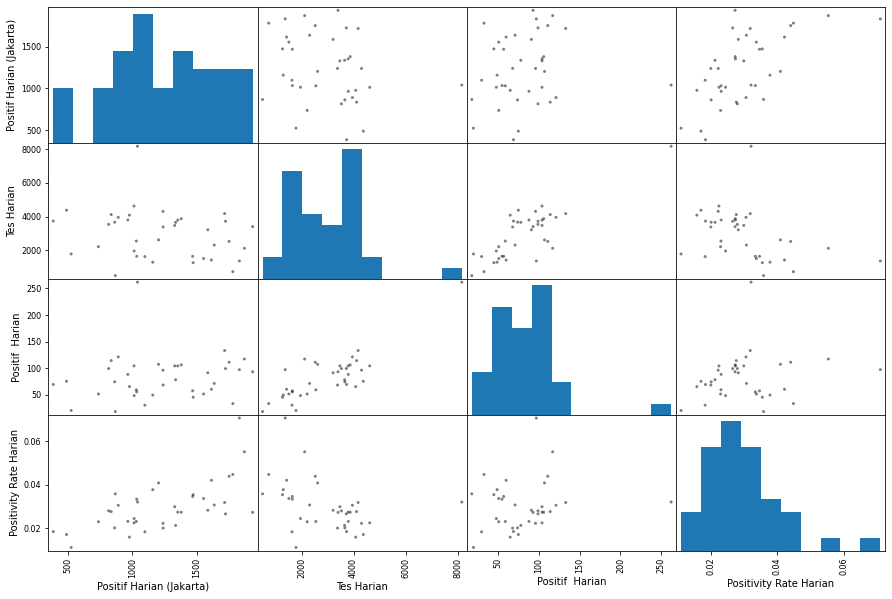

In [65]:
# membuat scatter plot matriks  

from pandas.plotting import scatter_matrix
attributes = ['Positif Harian (Jakarta)', 
              'Tes Harian', 
              'Positif  Harian', 
              'Positivity Rate Harian'
             ]
scatter_matrix(new_dataframe[attributes], figsize=(15,10), color='black')

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Tenaga Kesehatan', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Tenaga Kesehatan', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 1 Tenaga Kesehatan', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 2 Tenaga Kesehatan', ylabel='Positif Harian (Jakarta)'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Vaksinasi 1 Tenaga Kesehatan'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Tenaga Kesehatan', ylabel='Vaksinasi 1 Tenaga Kesehatan'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Tenaga Kesehatan', ylabel='Vaksinasi 1 Tenaga Kesehatan'>,
        <AxesSubplot:xlabel='Persentase 1 Tenaga Kesehatan', ylabel='Vaksinasi 1 Tenaga Kesehatan'>,
        <AxesSubplot:xlabel='Persentase 2 Tenaga Kesehatan', ylabel='Vaksinasi 1 Tenaga Kesehatan'>],
       [<AxesSubplot:x

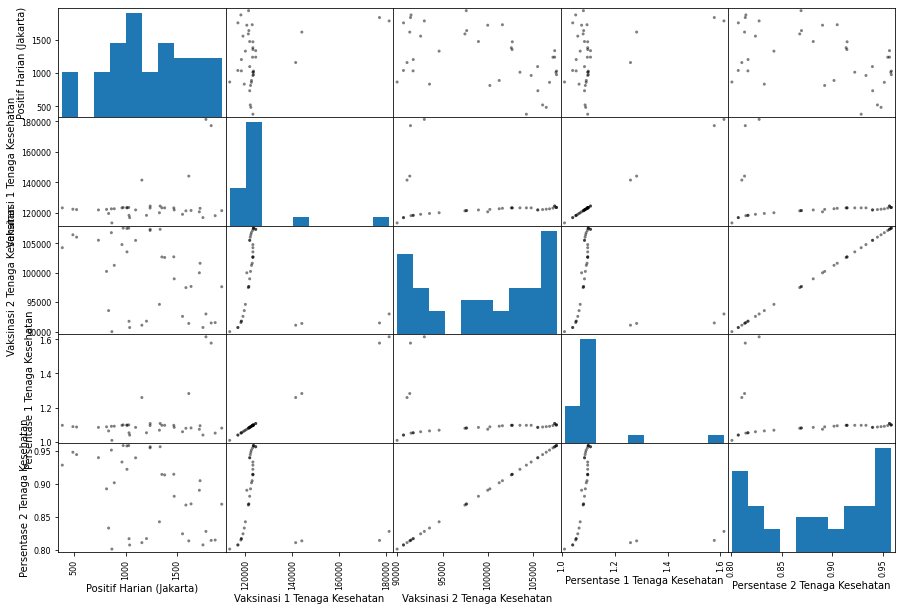

In [66]:
from pandas.plotting import scatter_matrix
attributes = [
              'Positif Harian (Jakarta)', 
              'Vaksinasi 1 Tenaga Kesehatan',
              'Vaksinasi 2 Tenaga Kesehatan',
              'Persentase 1 Tenaga Kesehatan',
              'Persentase 2 Tenaga Kesehatan'
             ]
scatter_matrix(new_dataframe[attributes], figsize=(15,10), color='black')

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Lansia', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Lansia', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 1 Lansia', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 2 Lansia', ylabel='Positif Harian (Jakarta)'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Vaksinasi 1 Lansia'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Lansia', ylabel='Vaksinasi 1 Lansia'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Lansia', ylabel='Vaksinasi 1 Lansia'>,
        <AxesSubplot:xlabel='Persentase 1 Lansia', ylabel='Vaksinasi 1 Lansia'>,
        <AxesSubplot:xlabel='Persentase 2 Lansia', ylabel='Vaksinasi 1 Lansia'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Vaksinasi 2 Lansia'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Lansia', ylabel='Vaksinas

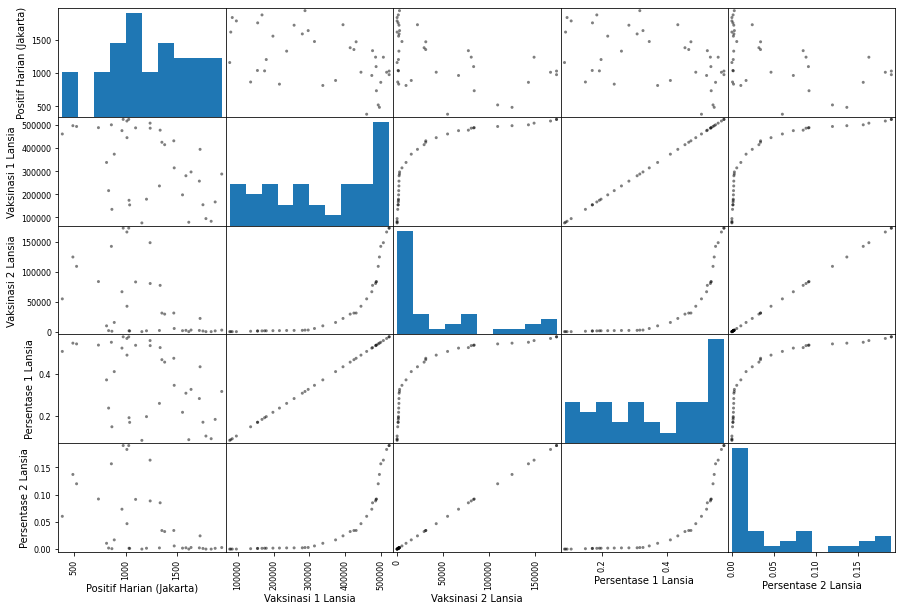

In [67]:
from pandas.plotting import scatter_matrix
attributes = [
              'Positif Harian (Jakarta)',
              'Vaksinasi 1 Lansia',
              'Vaksinasi 2 Lansia',
              'Persentase 1 Lansia',
              'Persentase 2 Lansia'
             ]
scatter_matrix(new_dataframe[attributes], figsize=(15,10), color='black')

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Pelayan Publik', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Pelayan Publik', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 1 Pelayan Publik', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 2 Pelayan Publik', ylabel='Positif Harian (Jakarta)'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Vaksinasi 1 Pelayan Publik'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Pelayan Publik', ylabel='Vaksinasi 1 Pelayan Publik'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Pelayan Publik', ylabel='Vaksinasi 1 Pelayan Publik'>,
        <AxesSubplot:xlabel='Persentase 1 Pelayan Publik', ylabel='Vaksinasi 1 Pelayan Publik'>,
        <AxesSubplot:xlabel='Persentase 2 Pelayan Publik', ylabel='Vaksinasi 1 Pelayan Publik'>],
       [<AxesSubplot:xlabel='Positif Harian (Jak

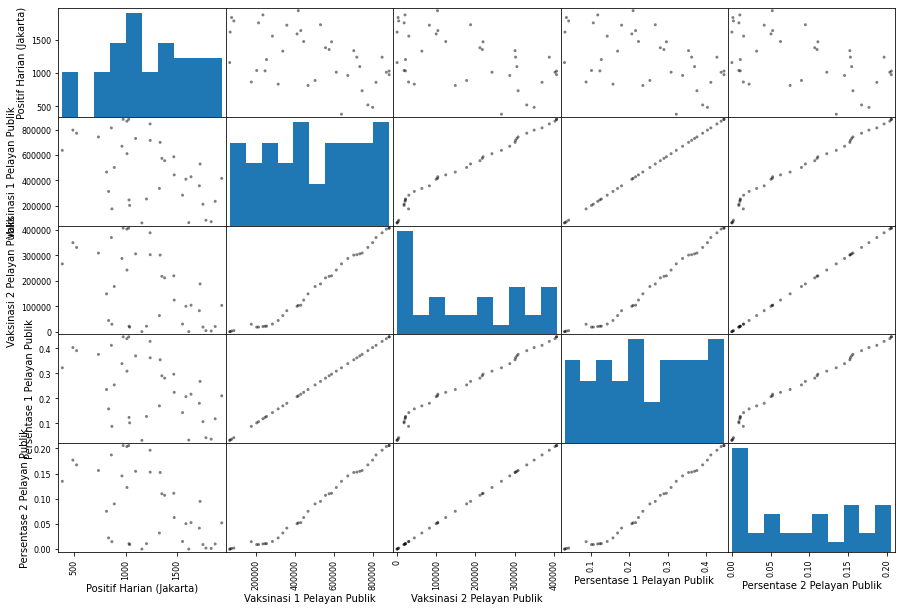

In [68]:
from pandas.plotting import scatter_matrix
attributes = [
               'Positif Harian (Jakarta)',
               'Vaksinasi 1 Pelayan Publik',
               'Vaksinasi 2 Pelayan Publik',
               'Persentase 1 Pelayan Publik',
               'Persentase 2 Pelayan Publik'
             ]
scatter_matrix(new_dataframe[attributes], figsize=(15,10), color='black')

array([[<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Total', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Total', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 1 Total', ylabel='Positif Harian (Jakarta)'>,
        <AxesSubplot:xlabel='Persentase 2 Total', ylabel='Positif Harian (Jakarta)'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Vaksinasi 1 Total'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Total', ylabel='Vaksinasi 1 Total'>,
        <AxesSubplot:xlabel='Vaksinasi 2 Total', ylabel='Vaksinasi 1 Total'>,
        <AxesSubplot:xlabel='Persentase 1 Total', ylabel='Vaksinasi 1 Total'>,
        <AxesSubplot:xlabel='Persentase 2 Total', ylabel='Vaksinasi 1 Total'>],
       [<AxesSubplot:xlabel='Positif Harian (Jakarta)', ylabel='Vaksinasi 2 Total'>,
        <AxesSubplot:xlabel='Vaksinasi 1 Total', ylabel='Vaksinasi 2 Total'>,
  

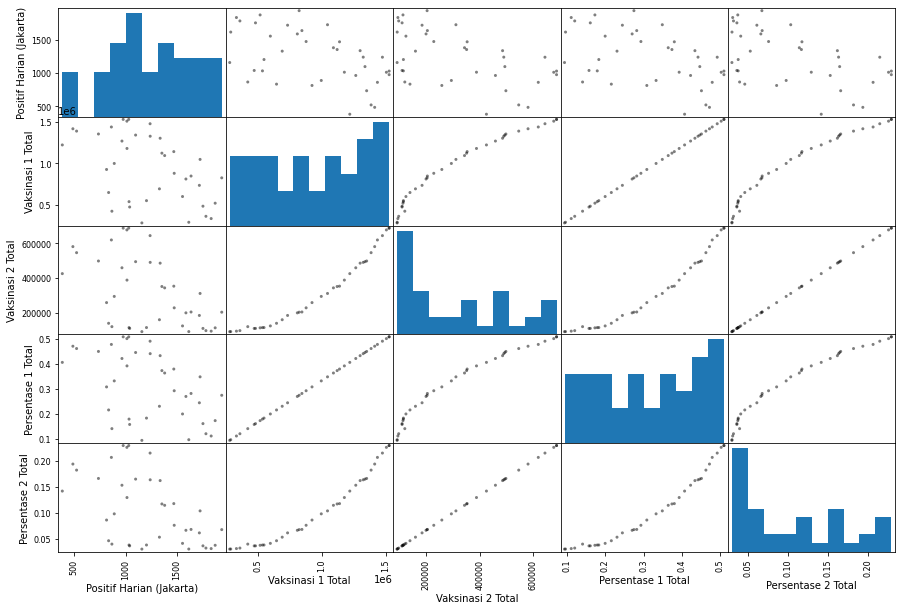

In [69]:
from pandas.plotting import scatter_matrix
attributes = [
              'Positif Harian (Jakarta)',
              'Vaksinasi 1 Total',
              'Vaksinasi 2 Total',
              'Persentase 1 Total',
              'Persentase 2 Total'
             ]
scatter_matrix(new_dataframe[attributes], figsize=(15,10), color='black')

In [70]:
#  melakukan korelasi dengan menggunakan fungsi .corr()
corr_matrix1 = new_dataframe.corr()

In [154]:
#  hasil dari matrik korelasi yang dilakukan positif harian Jakarta bersama fitur-fitur lain yang ada didalam new_dataframe

corr_matrix1['Positif Harian (Jakarta)'].sort_values(ascending=False)

Positif Harian (Jakarta)         1.000000
Positivity Rate Harian           0.632692
Persentase 1 Tenaga Kesehatan    0.328701
Vaksinasi 1 Tenaga Kesehatan     0.328701
Positif  Harian                  0.145230
Tes Harian                      -0.236262
Vaksinasi 2 Tenaga Kesehatan    -0.439850
Persentase 2 Tenaga Kesehatan   -0.439850
Persentase 1 Lansia             -0.494385
Vaksinasi 1 Lansia              -0.494385
Vaksinasi 2 Lansia              -0.496607
Persentase 2 Lansia             -0.496607
Persentase 1 Total              -0.497294
Vaksinasi 1 Total               -0.497294
Vaksinasi 1 Pelayan Publik      -0.504755
Persentase 1 Pelayan Publik     -0.504755
Persentase 2 Total              -0.519486
Vaksinasi 2 Total               -0.519486
Vaksinasi 2 Pelayan Publik      -0.519601
Persentase 2 Pelayan Publik     -0.519601
Name: Positif Harian (Jakarta), dtype: float64

 # Analisa :
Berdasarkan hasil scatter plot matriks dan nilai korelasi terhadap Positif Harian (Jakarta), 
variabel yang paling berpengaruh terhadap penekanan laju pertambahan Positif Harian (Jakarta) 
adalah <b><i>Positivity Rate Harian.</i></b>

# 3. Dari data pada langkah 2, buatlah model regresi dari data tersebut dengan menggunakan model machine learning berikut:

- Decision Tree Regressor
- Gradient Boost
- Random Forest Regressor

# Mendefinisikan X dan Y pada dataframe untuk melakukan Regresi

In [155]:
new_dataframe.tail(5)

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,...,Persentase 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total,Kelas
33,862,3665.0,74.0,0.020191,122553.0,106800.0,1.091290,0.951016,500370.0,142698.0,...,0.156530,813740.0,369813.0,0.411654,0.187081,1436663.0,619311.0,0.478778,0.206390,0
34,1239,4306.0,96.0,0.022294,123061.0,107175.0,1.095814,0.954355,507667.0,148824.0,...,0.163250,844961.0,388298.0,0.427448,0.196432,1475689.0,644297.0,0.491783,0.214716,0
35,1013,4619.0,104.0,0.022516,123387.0,107509.0,1.098717,0.957329,516816.0,166705.0,...,0.182865,866503.0,402918.0,0.438346,0.203828,1506706.0,677132.0,0.502120,0.225659,0
36,977,4081.0,65.0,0.015927,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,...,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151,0
37,1031,2550.0,59.0,0.023137,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,...,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151,0


In [156]:

X = new_dataframe['Positivity Rate Harian'].values

y= new_dataframe['Positif Harian (Jakarta)'].values

In [157]:
y.shape

(38,)

In [158]:
X.shape

(38,)

# Membagi data menjadi data latih dan data Uji serta melakukan Feature Scaling

- data latih mulai dari 5 Maret 2021 - 5 April 2021
- data uji mulai dari 6 April 2021 - 13 April 2021

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle=False)

In [160]:
y_train

array([1159, 1616, 1834, 1783,  867, 1040, 1754, 1873, 1034, 1204, 1555,
        835, 1330, 1719, 1588, 1937, 1638, 1474,  815,  890, 1726, 1381,
       1354, 1470, 1014,  384,  965, 1337, 1240, 1098,  736,  523],
      dtype=int64)

In [161]:
y_train.shape

(32,)

In [162]:
y_test

array([ 487,  862, 1239, 1013,  977, 1031], dtype=int64)

In [163]:
X_train

array([0.03777949, 0.04210526, 0.07075128, 0.04477612, 0.03585657,
       0.03210784, 0.04394299, 0.05521472, 0.03339405, 0.04088651,
       0.03370787, 0.02770352, 0.02994529, 0.03187156, 0.02831363,
       0.02733686, 0.03073593, 0.03548896, 0.02802151, 0.03060192,
       0.02662006, 0.02738311, 0.02744063, 0.03465046, 0.0244898 ,
       0.0184937 , 0.02317619, 0.02134063, 0.0201005 , 0.01839362,
       0.02301444, 0.01119821])

In [164]:
y_test.shape

(6,)

In [165]:
X_train= X_train.reshape(-1,1)
X_test= X_test.reshape(-1,1)

In [166]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [167]:
X_train.shape


(32, 1)

In [168]:
X_train.min()

-1.8366132473875612

In [169]:
y_train.min()

384

In [170]:
X_train.max()

3.4785385693564552

In [171]:
y_train.max()

1937

# Decision Tree Regressor 

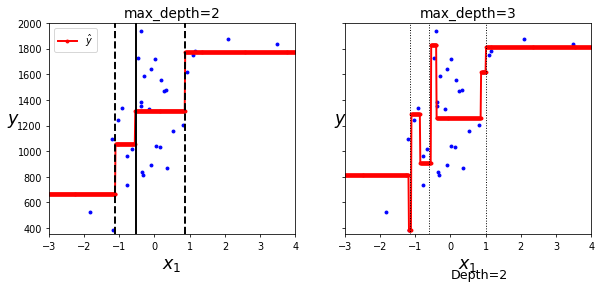

In [172]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)

def plot_regression_predictions(tree_reg, X, y, axes=[-3, 4,350 ,2000], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True, dpi=70)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X_train, y_train)
for split, style in ((-0.53, "k-"), (0.87, "k--"), (-1.125, "k--")):
    plt.plot([split, split], [350, 2000], style, linewidth=2)
plt.legend()
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X_train, y_train)
for split, style in ((-0.6, "k-"), (-1.15, "k--"), (1, "k--")):
    plt.plot([split, split], [0, 0.08], style, linewidth=2)
    

    plt.plot([split, split], [350, 2000], "k:", linewidth=1)
plt.text(0, 10, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

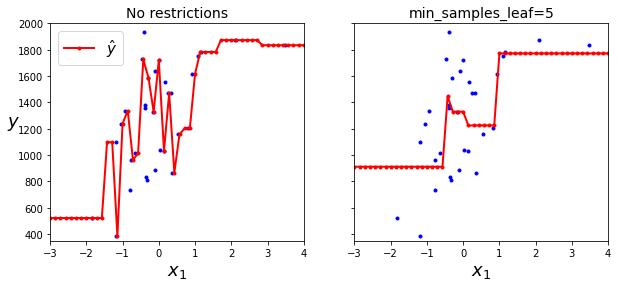

In [173]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)

x1 = np.linspace(-3, 4).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_train, y_train, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-3, 4,350 ,2000])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(fontsize=15)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X_train, y_train, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-3, 4,350 ,2000])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

In [174]:
y_test = y_test.reshape(-1,1)

In [175]:
tree_reg1.score(X_test,y_test)

-1.7413781901105985

In [176]:
tree_reg2.score(X_test,y_test)

-0.009806290235421233

# Gradient Boost

In [177]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1])
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc='lower right', fontsize=10)
    plt.axis(axes)

In [178]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [179]:

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

<ipython-input-177-17f9d06689f1>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
<ipython-input-177-17f9d06689f1>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)


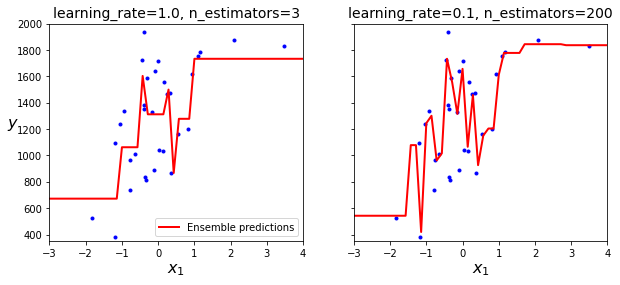

In [180]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X_train, y_train, axes=[-3, 4,350 ,2000], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X_train, y_train, axes=[-3, 4,350 ,2000])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [181]:
import numpy as np
from sklearn.metrics import mean_squared_error



gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=21, random_state=42)

In [182]:
min_error = np.min(errors)

<ipython-input-177-17f9d06689f1>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)


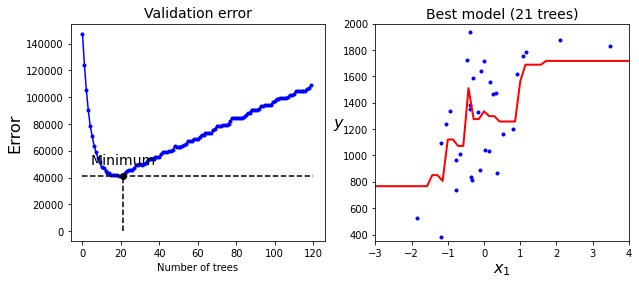

In [183]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)

plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X_train, y_train, axes=[-3, 4,350 ,2000])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

In [184]:
gbrt_best.score(X_test, y_test)

0.21307096326179342

# Random Forest Regressor 


In [185]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3)

In [186]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(min_samples_leaf=3, n_jobs=1)

In [187]:
X_test = X_test.reshape(-1,1)

Populating the interactive namespace from numpy and matplotlib


c:\users\yosia\appdata\local\programs\python\python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['style', 'fix', 'axes', 'split', 'clf', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'Estimated quality')

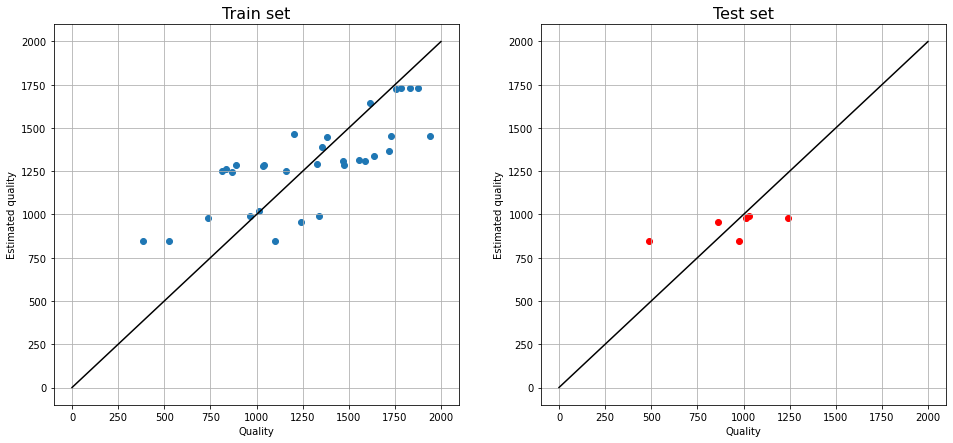

In [188]:
%pylab inline
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), alpha=1)
plot(range(2000), color='black')

grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=1)

plot(range(2000), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

In [189]:
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
rf.score(X_test, y_test)

0.2870688366804517

<h1>Analisa :</h1>
Model yang paling baik menurut kami adalah Gradient Boost, karena pada saat ada penambahan classifier suatu waktu nanti, bisa dilatih, diuji dan ditingkatkan lagi.

# 4. Menggunakan PCA untuk data pada langkah kedua

Analisa:
- Berdasarkan pengamatan Anda, tentukan model mana yang menurut Anda paling
baik dan jelaskan!
- Bandingkan hasilnya dengan hasil pada langkah 3. Jika ada perbedaan jelaskan
perbedaan hasil tersebut !


# Menggunakan PCA pada new_dataframe


In [190]:
new_dataframe.head(3)

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,...,Persentase 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total,Kelas
0,1159,1297.0,49.0,0.037779,141425.0,91078.0,1.259339,0.811017,76451.0,0.0,...,0.0,64121.0,0.0,0.032437,0.000000,281997.0,91078.0,0.093977,0.030352,1
1,1616,1425.0,60.0,0.042105,144046.0,91379.0,1.282678,0.813697,79421.0,0.0,...,0.0,66484.0,0.0,0.033633,0.000000,289951.0,91379.0,0.096628,0.030453,1
2,1834,1371.0,97.0,0.070751,177126.0,91460.0,1.577243,0.814418,83628.0,0.0,...,0.0,73752.0,2514.0,0.037310,0.001272,334506.0,93974.0,0.111476,0.031317,2


**Mengambil lokasi dari new_dataframe**

In [191]:
X = new_dataframe.iloc[:, 1:19].values
y = new_dataframe.iloc[:,0].values

**Membagi data menjadi data latih dan data uji**

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle=False)

In [193]:
X_train.shape

(32, 18)

In [194]:
y_test

array([ 487,  862, 1239, 1013,  977, 1031], dtype=int64)

**Melakukan Feature Scaling terhadap data latih dan data uji**

In [195]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Cara singkat membuat PCA dengan menggunakan sklearn, jadi tidak perlu menggunakan cara manual, seperti Eigen Decomposition, Singular Value Decomposition**

In [196]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[-4.89948531, -1.497851  ],
       [-4.97539383, -1.57107862],
       [-5.93092044, -3.70647592],
       [-5.13623767, -4.51218254],
       [-3.63026648, -0.26073538],
       [-3.47186759,  4.73102788],
       [-3.64156629,  1.08002645],
       [-3.65018757,  0.75470639],
       [-3.03363206,  0.23811175],
       [-3.16561818,  1.00754861],
       [-2.63168681,  0.0884724 ],
       [-2.1160554 ,  1.64741644],
       [-1.7396978 ,  1.22319216],
       [-0.97930965,  1.56898814],
       [-0.67048338,  0.85911946],
       [-0.53977578,  0.94191698],
       [-0.50246885,  0.29144962],
       [-0.14756593, -0.4963555 ],
       [ 0.56824662,  0.82186585],
       [ 1.21840196,  1.03102713],
       [ 1.75495346,  0.68416262],
       [ 2.31750839,  0.66505583],
       [ 2.52582247,  0.59658816],
       [ 2.47569312, -0.71994342],
       [ 3.29553142, -0.71777797],
       [ 4.07535836,  0.02271984],
       [ 4.55927461,  0.03183561],
       [ 5.2398107 , -0.34040382],
       [ 5.44115723,

**Fitting Logistic Regression untuk Training set**

In [197]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Prediksi hasil data uji**

In [198]:
y_pred = classifier.predict(X_test)

**Membuat Confusion Matrix**

In [199]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

**Visualisasi dari hasil data latih**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

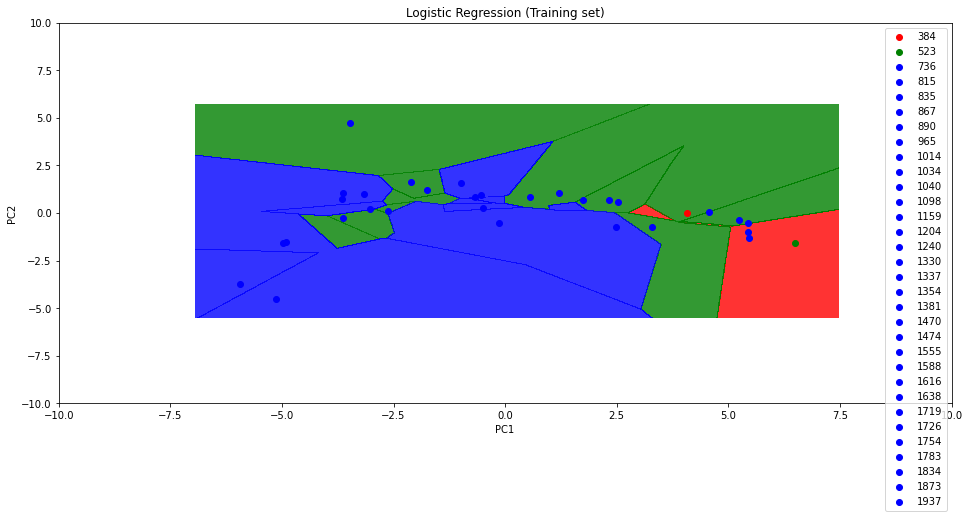

In [200]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i),label=j)
plt.title('Logistic Regression (Training set)')
figsize(10,8)
plt.axis([-10,10,-10,10])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**Visualisasi dari hasil data uji**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

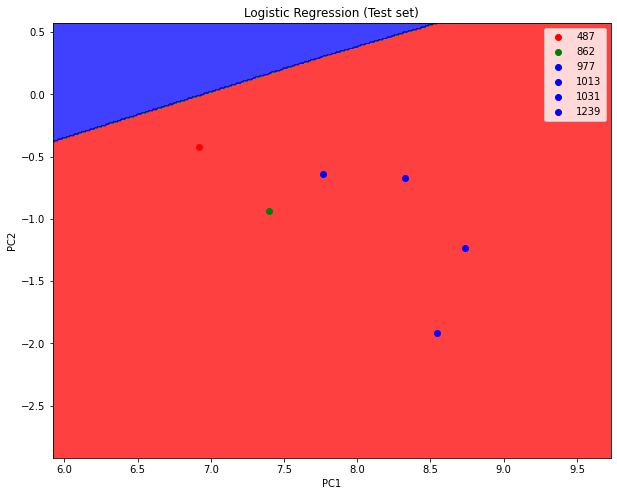

In [201]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Setelah kami membedakan PCA dengan Gradient Boost (langkah ke-3), maka, yang membedakan antara PCA dan Gradient Boost adalah karena sebaran data di PCA tidak sesuai dengan warnanya sehingga terlihat berantakan.

# 5. Tambahkan kolom baru pada data langkah 2 dengan nama ’Kelas’, lalu lakukan pembagian sebagai berikut :
- Jika nilai kolom Positivity Rate kurang dari 3.3 persen diberi nilai 0
- Jika nilai kolom Positivity Rate lebih dari 5.0 persen diberi nilai 2
- Sisanya diberi nilai 1


In [202]:
new_dataframe.tail(6)

,Positif Harian (Jakarta),Tes Harian,Positif Harian,Positivity Rate Harian,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Persentase 1 Tenaga Kesehatan,Persentase 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,...,Persentase 2 Lansia,Vaksinasi 1 Pelayan Publik,Vaksinasi 2 Pelayan Publik,Persentase 1 Pelayan Publik,Persentase 2 Pelayan Publik,Vaksinasi 1 Total,Vaksinasi 2 Total,Persentase 1 Total,Persentase 2 Total,Kelas
32,487,4373.0,75.0,0.017151,122326.0,106437.0,1.089269,0.947783,496569.0,124880.0,...,0.136985,796248.0,349648.0,0.402805,0.176880,1415143.0,580965.0,0.471606,0.193611,0
33,862,3665.0,74.0,0.020191,122553.0,106800.0,1.091290,0.951016,500370.0,142698.0,...,0.156530,813740.0,369813.0,0.411654,0.187081,1436663.0,619311.0,0.478778,0.206390,0
34,1239,4306.0,96.0,0.022294,123061.0,107175.0,1.095814,0.954355,507667.0,148824.0,...,0.163250,844961.0,388298.0,0.427448,0.196432,1475689.0,644297.0,0.491783,0.214716,0
35,1013,4619.0,104.0,0.022516,123387.0,107509.0,1.098717,0.957329,516816.0,166705.0,...,0.182865,866503.0,402918.0,0.438346,0.203828,1506706.0,677132.0,0.502120,0.225659,0
36,977,4081.0,65.0,0.015927,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,...,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151,0
37,1031,2550.0,59.0,0.023137,123474.0,107573.0,1.099492,0.957899,523861.0,173234.0,...,0.190026,880884.0,406805.0,0.445621,0.205794,1528219.0,687612.0,0.509289,0.229151,0


<h2>Setelah melihat isi data kembali, langkah selanjutnya adalah membuat sebuah kolom baru yang bernamakan "Kelas".</h2>

In [203]:
new_dataframe['Kelas'] = 0

<h2>Lalu, langkah selanjutnya adalah membuat beberapa kondisi, yang dimana bertujuan untuk menentukan nilai-nilai dari setiap data</h2>

In [204]:

for i in range(0,len(new_dataframe)):
    if 0 < new_dataframe['Positivity Rate Harian'][i] < 0.033:
        new_dataframe['Kelas'][i] = 0
    elif 0 < new_dataframe['Positivity Rate Harian'][i] > 0.05:
        new_dataframe['Kelas'][i] = 2
    else:
        new_dataframe['Kelas'][i] = 1

<ipython-input-204-ab45ca49b50e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Kelas'][i] = 1
<ipython-input-204-ab45ca49b50e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Kelas'][i] = 2
<ipython-input-204-ab45ca49b50e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['Kelas'][i] = 0


<h2>Maka, hasil yang didapat dari nilai-nilai tersebut dapat dilihat dibawah :</h2>

In [205]:
new_dataframe['Kelas']

0     1
1     1
2     2
3     1
4     1
5     0
6     1
7     2
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
Name: Kelas, dtype: int64

In [206]:
#  Mengambil data dari kolom Kelas 
X = new_dataframe.iloc[:, -1].values
y = new_dataframe.iloc[:, 0].values

In [207]:
X

array([1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle=False)

In [209]:
X_test

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [210]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [211]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [212]:
X_test

array([[-0.71818485],
       [-0.71818485],
       [-0.71818485],
       [-0.71818485],
       [-0.71818485],
       [-0.71818485]])

# 6. Dari data pada langkah 5, lakukanlah klasifikasi dengan membuat model machine learning sebagai berikut:
- Voting Classifiers yang di dalamnya terdapat beberapa model, yaitu: RandomForestClassifier, Voting Classifier, Logistic Regression
- AdaBoost
Analisa:
- Berdasarkan pengamatan Anda, tentukan model mana yang menurut Anda paling
baik dan jelaskan!


# Voting Classifiers

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [214]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

**Perbandingan Logistic Regression, Random Forest Classifier, dan SVC**

In [215]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.0
RandomForestClassifier 0.0
SVC 0.0
VotingClassifier 0.0


In [216]:
y_pred

array([1937, 1937, 1937, 1937, 1937, 1937], dtype=int64)

# Ada Boost

In [217]:
X_train.shape

(32, 1)

In [218]:
y_train.shape

(32,)

**Klasifikasi dari data asli**

In [219]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [220]:
y_pred1 = ada_clf.predict(X_test)
y_pred1

array([384, 384, 384, 384, 384, 384], dtype=int64)

In [221]:
 print(accuracy_score(y_test, y_pred1))

0.0


**Kami memilih Voting Classifier sebagai model yang paling baik, karena Voting Classifier berisi kumpulan (multi-model) jenis model yang nantinya model terbaik akan ditentukan berdasarkan hasil voting, sedangkan AdaBoost berisi sebuah (single-model) jenis model.**